Bosques aleatorios

Están relacinados con los árboles de decisión. Un bosque aleatorio se construye con múltiples árboles de decisión
y los combina para obtener una predicción más robusta y precisa.
Cada árbol se entrena con una muestra diferente del conjunto de datos
y selecciona un subconjunto aleatorio de características para dividir en cada nodo.

EJEMPLOS DE USO

Detección de fraudes:
Variables: detalles de transacciones, patrones de comportamiento del usuario, etc.
Objetivo: Identificar transacciones fraudulentas.
Uso: Seguridad en sistemas de pagos electrónicos.

In [50]:
!pip3 install numpy pandas matplotlib scikit-learn imbalanced-learn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [51]:
# Importar las bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


print("Todas las bibliotecas se importaron correctamente.")

Todas las bibliotecas se importaron correctamente.


In [52]:
# Generar datos sintéticos para segmentación de mercado
np.random.seed(0)
n = 200

edad = np.random.randint(18, 70, n)
ingreso = np.random.randint(20000, 120000, n)
genero = np.random.choice(['M', 'F'], n)
compra = np.random.choice(['Sí', 'No'], n)

# Crear DataFrame
data = pd.DataFrame({
    'Edad': edad,
    'Ingreso Anual': ingreso,
    'Género': genero,
    'Compra': compra
})

# Guardar a CSV
data.to_csv('segmentacion_mercado.csv', index=False)

In [53]:
# Cargar datos
data = pd.read_csv('segmentacion_mercado.csv')

# Mostrar las primeras filas
print(data.head())
print(data.describe())

   Edad  Ingreso Anual Género Compra
0    62          37340      F     No
1    65          21913      M     Sí
2    18          72086      F     Sí
3    21          33429      M     Sí
4    21          33907      F     No
             Edad  Ingreso Anual
count  200.000000     200.000000
mean    42.505000   71450.770000
std     15.790716   28887.208399
min     18.000000   20469.000000
25%     29.000000   47773.250000
50%     41.500000   72375.000000
75%     56.250000   98652.000000
max     69.000000  119751.000000


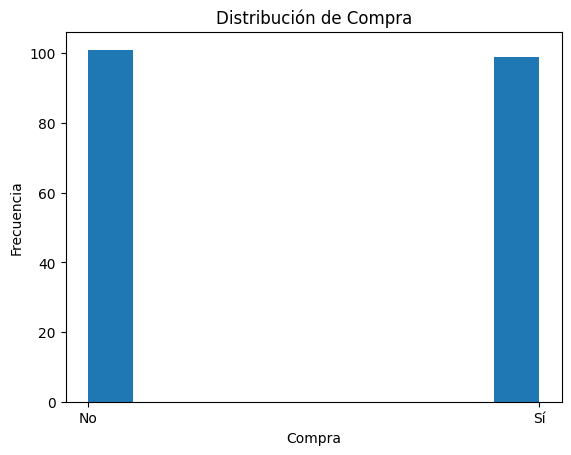

In [54]:
# Distribución de compra
plt.hist(data['Compra'])
plt.xlabel('Compra')
plt.ylabel('Frecuencia')
plt.title('Distribución de Compra')
plt.show()

# Codificar las variables categóricas
label_encoder = LabelEncoder()
data['Género'] = label_encoder.fit_transform(data['Género'])
data['Compra'] = label_encoder.fit_transform(data['Compra'])

In [55]:
# Características que vamos a tener en cuenta para entrenar el modelo
X = data[['Edad', 'Ingreso Anual', 'Género']]

# Objetivo, saber la probabilidad de si alguien con ciertas características va a comprar
y = data['Compra']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
# # Balancear las clases y ajustar los hiperparámetros usando un pipeline
# pipeline = Pipeline([
#     ('smote', SMOTE(random_state=0)),
#     ('rf', RandomForestClassifier(random_state=0))
# ])

# # Hiperparámetros para buscar
# param_grid = {
#     'rf__n_estimators': [50, 100, 200],
#     'rf__max_depth': [None, 10, 20, 30],
#     'rf__min_samples_split': [2, 5, 10],
#     'rf__min_samples_leaf': [1, 2, 4],
# }

# # Búsqueda aleatoria de hiperparámetros
# random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=20, cv=5, random_state=0, n_jobs=-1)

# # Entrenar el modelo
# random_search.fit(X_train, y_train)

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [57]:
# Predecir en el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Precisión:", accuracy_rf)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_rf))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

Precisión: 0.525
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.64      0.56      0.60        25
           1       0.39      0.47      0.42        15

    accuracy                           0.53        40
   macro avg       0.51      0.51      0.51        40
weighted avg       0.54      0.53      0.53        40

Matriz de confusión:
[[14 11]
 [ 8  7]]


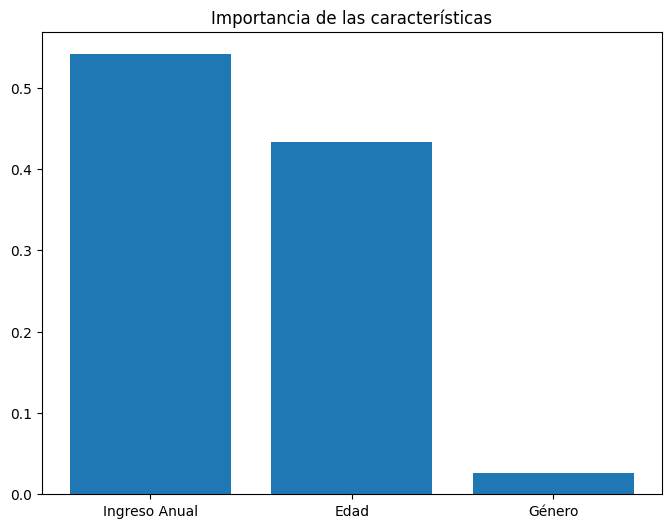

In [58]:
# Visualizar la importancia de las características
importances_rf = modelo_rf.feature_importances_
features = X.columns
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(8, 6))
plt.title('Importancia de las características')
plt.bar(range(X.shape[1]), importances_rf[indices_rf], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices_rf])
plt.show()